# Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing, model_selection
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the data

In [2]:
Data = pd.read_csv('dataset IV.csv')
Data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
Data.pop('Unnamed: 32')
x = Data.copy()
x.pop('id')
x.pop('diagnosis')
x = np.array(x)
y = np.array(Data['diagnosis'])
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=40)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Implementing the model and training it

In [6]:
model = tf.keras.models.Sequential()
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Activation(tf.keras.activations.sigmoid))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Activation(tf.keras.activations.sigmoid))
model.add(Dense(1, activation='sigmoid'))

In [7]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.00001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [8]:
model.compile(SGD(learning_rate=lr_schedule, momentum=1), loss=['binary_crossentropy'], metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 2000, validation_data=(x_val, y_val))

Epoch 1/2000
4/4 [==============================] - 3s 77ms/step - loss: 0.6706 - accuracy: 0.5956 - val_loss: 0.6797 - val_accuracy: 0.5965
Epoch 2/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6729 - accuracy: 0.5934 - val_loss: 0.6797 - val_accuracy: 0.5965
Epoch 3/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.5912 - val_loss: 0.6796 - val_accuracy: 0.5965
Epoch 4/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6799 - accuracy: 0.5692 - val_loss: 0.6795 - val_accuracy: 0.5965
Epoch 5/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 0.5912 - val_loss: 0.6794 - val_accuracy: 0.5965
Epoch 6/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6632 - accuracy: 0.6571 - val_loss: 0.6793 - val_accuracy: 0.5965
Epoch 7/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.6000 - val_loss: 0.6791 - val_accuracy: 0.6140
Epoch 8/2000


# Evaluation

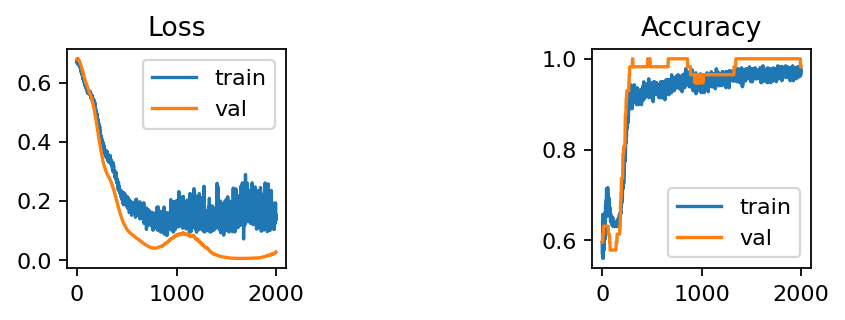

In [10]:
plt.figure(dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [11]:
y_hat = model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [12]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.9824561403508771
Accuracy:  0.9824561403508771
Precision:  0.9824561403508771
Recall:  0.9824561403508771
Confusion Matrix: 



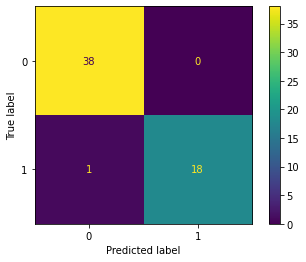

In [13]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()